# 🔍 Análise Exploratória Inicial - Reclame Aqui

**Objetivo:** Primeira análise visual dos dados coletados das APIs do Reclame Aqui

**Dados Disponíveis:**
- ✅ 32 categorias principais com 339 subcategorias
- ✅ Top 10 empresas de Meios de Pagamento Eletrônico
- ✅ Sistema de leitura de dados funcionando

---

## 📦 Setup e Imports

In [2]:
%pip install pandas matplotlib seaborn ploty

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [1]:

# Imports essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Imports do nosso sistema
from utils_notebook import NotebookHelper

print("📚 Imports realizados com sucesso!")

📚 Imports realizados com sucesso!


In [2]:
# Configurar ambiente
helper = NotebookHelper(verbose=False)
helper.configurar_plots(figsize=(12, 8))

# Configurações do notebook
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

print("⚙️  Configurações aplicadas!")

Bucket 'reclameaqui-landing' já existe.
Bucket 'reclameaqui-raw' já existe.
Bucket 'reclameaqui-trusted' já existe.
Bucket 'reclameaqui-landing' já existe.
Bucket 'reclameaqui-raw' já existe.
Bucket 'reclameaqui-trusted' já existe.
⚙️  Configurações aplicadas!


## 📥 Carregamento dos Dados

In [3]:
# Carregar todos os dados disponíveis
print("📊 Carregando dados do MinIO...")
dados = helper.carregar_dados_basicos()

print(f"\n✅ Datasets carregados: {list(dados.keys())}")
print(f"📈 Total de datasets: {len(dados)}")

📊 Carregando dados do MinIO...
📥 Carregando dados disponíveis...
✅ Categorias: 339 subcategorias
✅ Categorias com ranking: 1
✅ Bancos e Financeiras / Meios de pagamento eletrônico: 10 empresas

📊 Total de datasets carregados: 3

✅ Datasets carregados: ['categorias', 'categorias_com_ranking', 'ranking_bancos-e-financeiras_meios-de-pagamento-eletronico']
📈 Total de datasets: 3


In [4]:
# Overview rápido dos dados
for nome, df in dados.items():
    if isinstance(df, pd.DataFrame):
        print(f"📋 {nome}: {df.shape[0]} linhas x {df.shape[1]} colunas")
        if nome == 'categorias':
            print(f"   🏷️  Categorias principais únicas: {df['main_title'].nunique()}")
        elif nome.startswith('ranking_'):
            categoria = nome.replace('ranking_', '').replace('_', ' ').title()
            print(f"   🏆 {categoria}: Score médio {df['finalScore'].mean():.2f}")

📋 categorias: 339 linhas x 6 colunas
   🏷️  Categorias principais únicas: 32
📋 categorias_com_ranking: 1 linhas x 7 colunas
📋 ranking_bancos-e-financeiras_meios-de-pagamento-eletronico: 10 linhas x 32 colunas
   🏆 Bancos-E-Financeiras Meios-De-Pagamento-Eletronico: Score médio 9.44


## 🏷️ Análise das Categorias Disponíveis

In [5]:
# Análise das categorias
if 'categorias' in dados:
    df_cat = dados['categorias']
    
    print("📊 ESTATÍSTICAS DAS CATEGORIAS")
    print("=" * 40)
    print(f"Total de categorias principais: {df_cat['main_title'].nunique()}")
    print(f"Total de subcategorias: {len(df_cat)}")
    print(f"Média de subcategorias por categoria: {len(df_cat) / df_cat['main_title'].nunique():.1f}")
    
    # Top categorias com mais subcategorias
    top_categorias = df_cat.groupby('main_title').size().sort_values(ascending=False).head(10)
    print("\n🏆 TOP 10 CATEGORIAS COM MAIS SUBCATEGORIAS:")
    for i, (categoria, count) in enumerate(top_categorias.items(), 1):
        print(f"{i:2d}. {categoria}: {count} subcategorias")
else:
    print("❌ Dados de categorias não disponíveis")

📊 ESTATÍSTICAS DAS CATEGORIAS
Total de categorias principais: 32
Total de subcategorias: 339
Média de subcategorias por categoria: 10.6

🏆 TOP 10 CATEGORIAS COM MAIS SUBCATEGORIAS:
 1. Alimentos e Bebidas: 22 subcategorias
 2. Bancos e Financeiras: 21 subcategorias
 3. Casa e Construção: 20 subcategorias
 4. Moda: 20 subcategorias
 5. Veículos e Acessórios: 18 subcategorias
 6. Saúde: 15 subcategorias
 7. Beleza e Estética: 13 subcategorias
 8. Transportes e Serviços: 13 subcategorias
 9. Seguradoras: 12 subcategorias
10. Arte e Entretenimento: 12 subcategorias


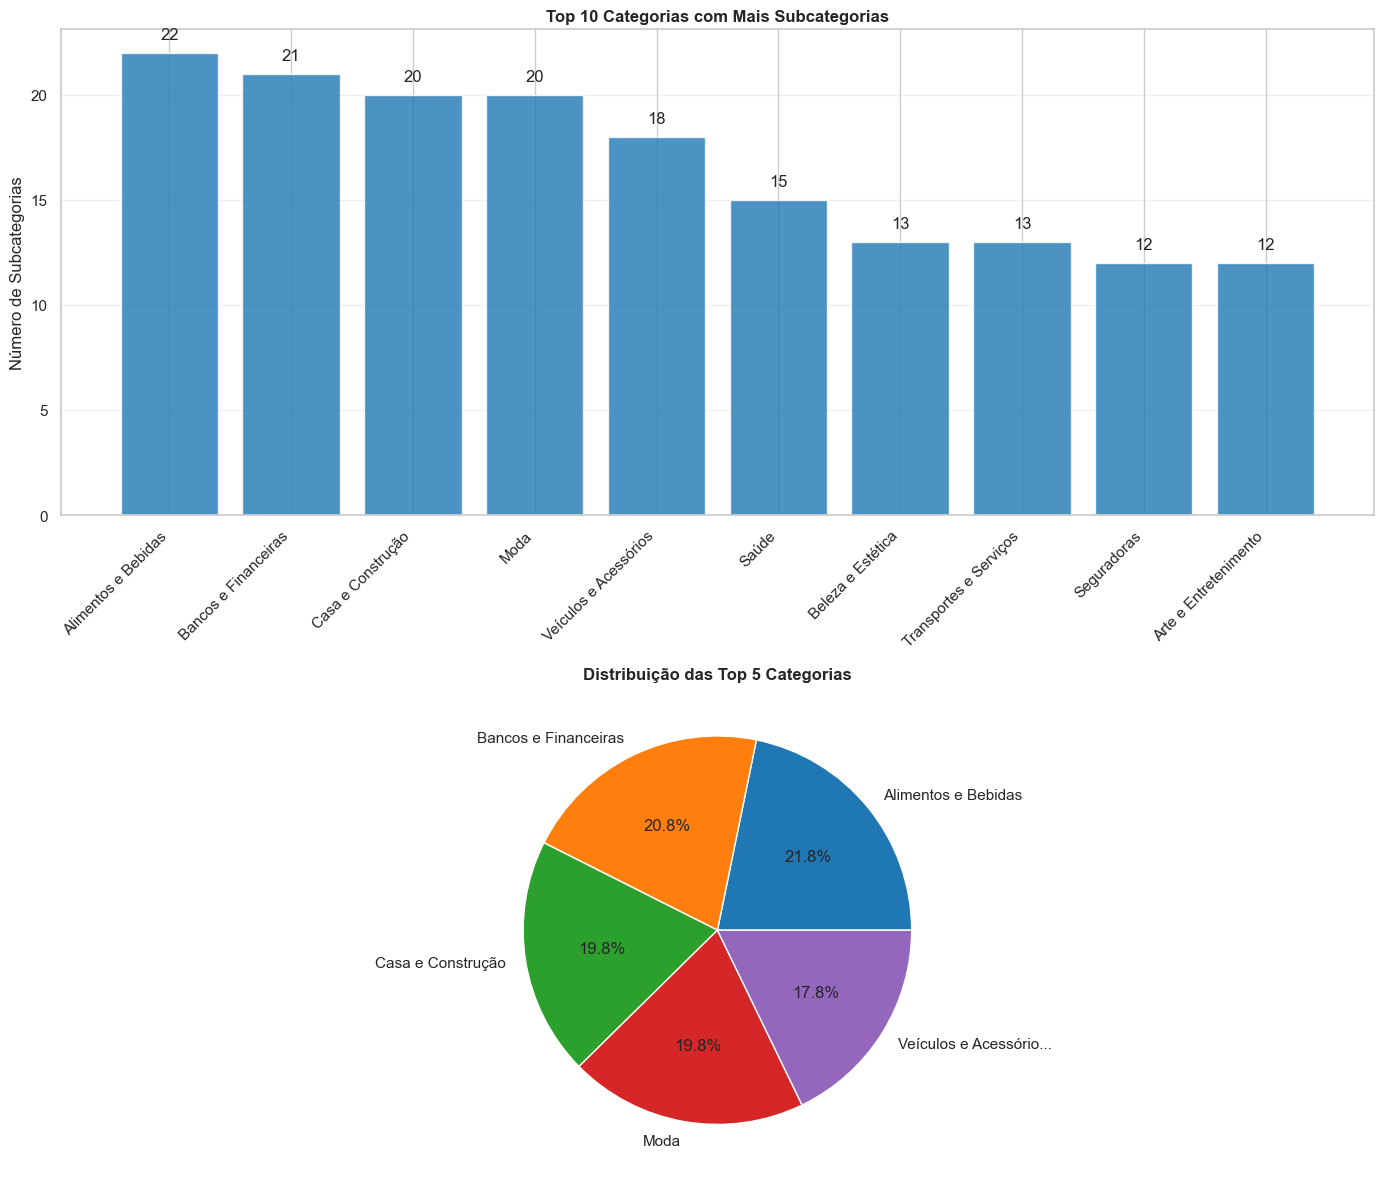

In [6]:
# Visualização das categorias
if 'categorias' in dados:
    fig = helper.plot_categorias_overview(dados['categorias'])
    plt.show()
else:
    print("❌ Não foi possível criar gráfico de categorias")

## 🏆 Análise dos Rankings de Empresas

In [7]:
# Encontrar datasets de ranking
rankings = {k: v for k, v in dados.items() if k.startswith('ranking_')}

print(f"📊 RANKINGS DISPONÍVEIS: {len(rankings)}")
print("=" * 50)

for nome, df in rankings.items():
    categoria = nome.replace('ranking_', '').replace('_', ' / ').title()
    print(f"\n🏷️  {categoria}")
    print(f"   📈 Empresas: {len(df)}")
    
    if 'finalScore' in df.columns:
        print(f"   🎯 Score médio: {df['finalScore'].mean():.2f}")
        print(f"   ⭐ Melhor score: {df['finalScore'].max():.2f} ({df.loc[df['finalScore'].idxmax(), 'companyName']})")
        print(f"   ⚠️  Menor score: {df['finalScore'].min():.2f} ({df.loc[df['finalScore'].idxmin(), 'companyName']})")
    
    if 'isVerified' in df.columns:
        verificadas = df['isVerified'].sum()
        print(f"   ✅ Empresas verificadas: {verificadas}/{len(df)} ({verificadas/len(df)*100:.1f}%)")
    
    if 'solvedPercentual' in df.columns:
        print(f"   🎯 Taxa de resolução média: {df['solvedPercentual'].mean():.1f}%")

📊 RANKINGS DISPONÍVEIS: 1

🏷️  Bancos-E-Financeiras / Meios-De-Pagamento-Eletronico
   📈 Empresas: 10
   🎯 Score médio: 9.44
   ⭐ Melhor score: 9.70 (Paag Tecnologia S.A)
   ⚠️  Menor score: 9.20 (LyTex Pagamentos)
   ✅ Empresas verificadas: 10/10 (100.0%)
   🎯 Taxa de resolução média: 97.3%


## 💳 Análise Detalhada: Meios de Pagamento Eletrônico

In [8]:
# Focar no ranking de meios de pagamento
ranking_pagamento = None
for nome, df in rankings.items():
    if 'meios-de-pagamento' in nome:
        ranking_pagamento = df
        break

if ranking_pagamento is not None and len(ranking_pagamento) > 0:
    print("💳 ANÁLISE DETALHADA: MEIOS DE PAGAMENTO ELETRÔNICO")
    print("=" * 60)
    
    # Estatísticas básicas
    print(f"📊 Total de empresas: {len(ranking_pagamento)}")
    print(f"🎯 Score médio: {ranking_pagamento['finalScore'].mean():.2f}")
    print(f"📈 Taxa de resolução média: {ranking_pagamento['solvedPercentual'].mean():.1f}%")
    print(f"📞 Taxa de resposta média: {ranking_pagamento['answeredPercentual'].mean():.1f}%")
    
    # Top 5 empresas
    print("\n🏆 TOP 5 EMPRESAS:")
    top5 = ranking_pagamento.nlargest(5, 'finalScore')
    for i, (_, empresa) in enumerate(top5.iterrows(), 1):
        verificada = "✅" if empresa.get('isVerified', False) else "⭕"
        print(f"{i}. {verificada} {empresa['companyName']}")
        print(f"   📊 Score: {empresa['finalScore']:.1f} | Resolvidas: {empresa['solvedPercentual']:.1f}% | Reclamações: {empresa['complainsCount']}")
    
    # Mostrar dataframe completo
    print("\n📋 DADOS COMPLETOS:")
    colunas_importantes = ['companyName', 'finalScore', 'solvedPercentual', 'answeredPercentual', 'complainsCount', 'isVerified']
    colunas_disponiveis = [col for col in colunas_importantes if col in ranking_pagamento.columns]
    display(ranking_pagamento[colunas_disponiveis].round(1))
    
else:
    print("❌ Dados de meios de pagamento não encontrados")

💳 ANÁLISE DETALHADA: MEIOS DE PAGAMENTO ELETRÔNICO
📊 Total de empresas: 10
🎯 Score médio: 9.44
📈 Taxa de resolução média: 97.3%
📞 Taxa de resposta média: 99.9%

🏆 TOP 5 EMPRESAS:
1. ✅ Paag Tecnologia S.A
   📊 Score: 9.7 | Resolvidas: 96.1% | Reclamações: 58
2. ✅ Gringo 
   📊 Score: 9.6 | Resolvidas: 99.0% | Reclamações: 612
3. ✅ SuitPay
   📊 Score: 9.6 | Resolvidas: 95.1% | Reclamações: 734
4. ✅ TRYPLOPAY
   📊 Score: 9.5 | Resolvidas: 97.8% | Reclamações: 1068
5. ✅ Ton - Soluções de Pagamento
   📊 Score: 9.5 | Resolvidas: 97.3% | Reclamações: 6275

📋 DADOS COMPLETOS:


,companyName,finalScore,solvedPercentual,answeredPercentual,complainsCount,isVerified
0,Paag Tecnologia S.A,9.7,96.1,100.0,58,True
1,Gringo,9.6,99.0,98.9,612,True
2,SuitPay,9.6,95.1,100.0,734,True
3,TRYPLOPAY,9.5,97.8,100.0,1068,True
4,Ton - Soluções de Pagamento,9.5,97.3,100.0,6275,True
5,SimPay,9.4,98.1,99.8,587,True
6,SumUp,9.4,97.7,100.0,2290,True
7,PJBank,9.3,97.1,100.0,560,True
8,LyTex Pagamentos,9.2,100.0,100.0,116,True
9,Stone,9.2,95.2,100.0,1297,True


## 📊 Visualizações Principais

📊 Criando visualizações...


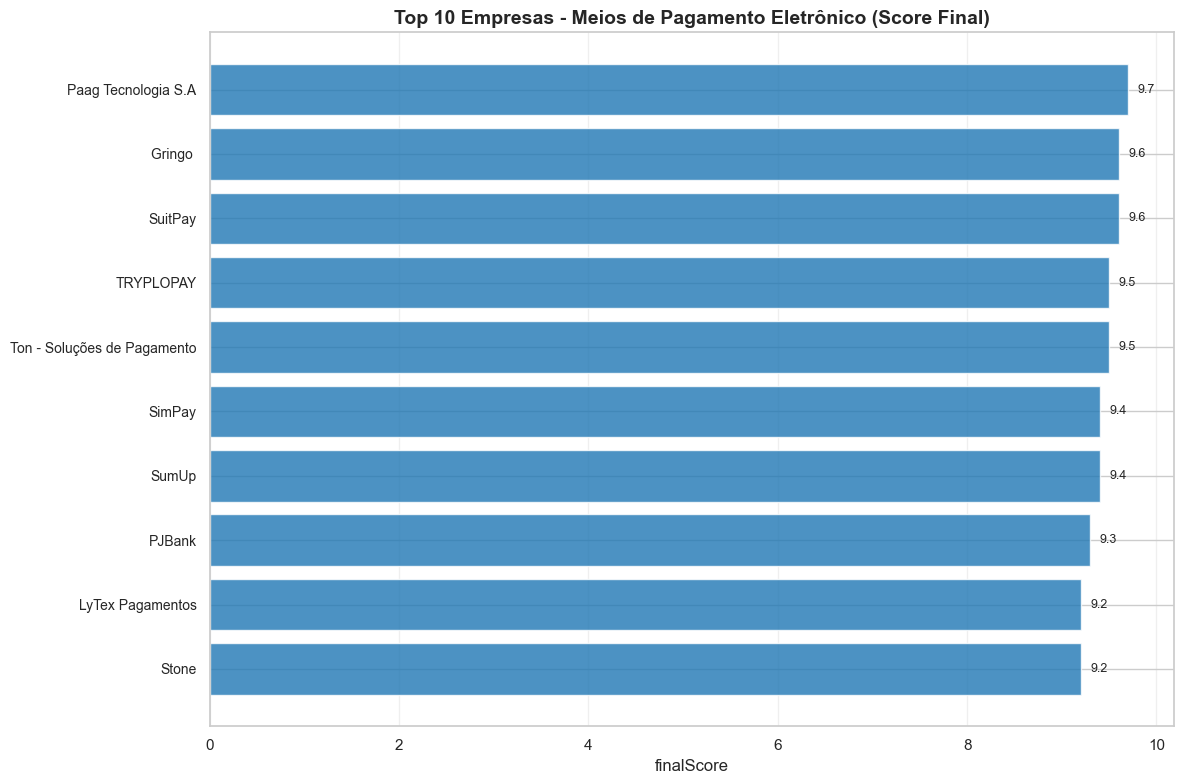

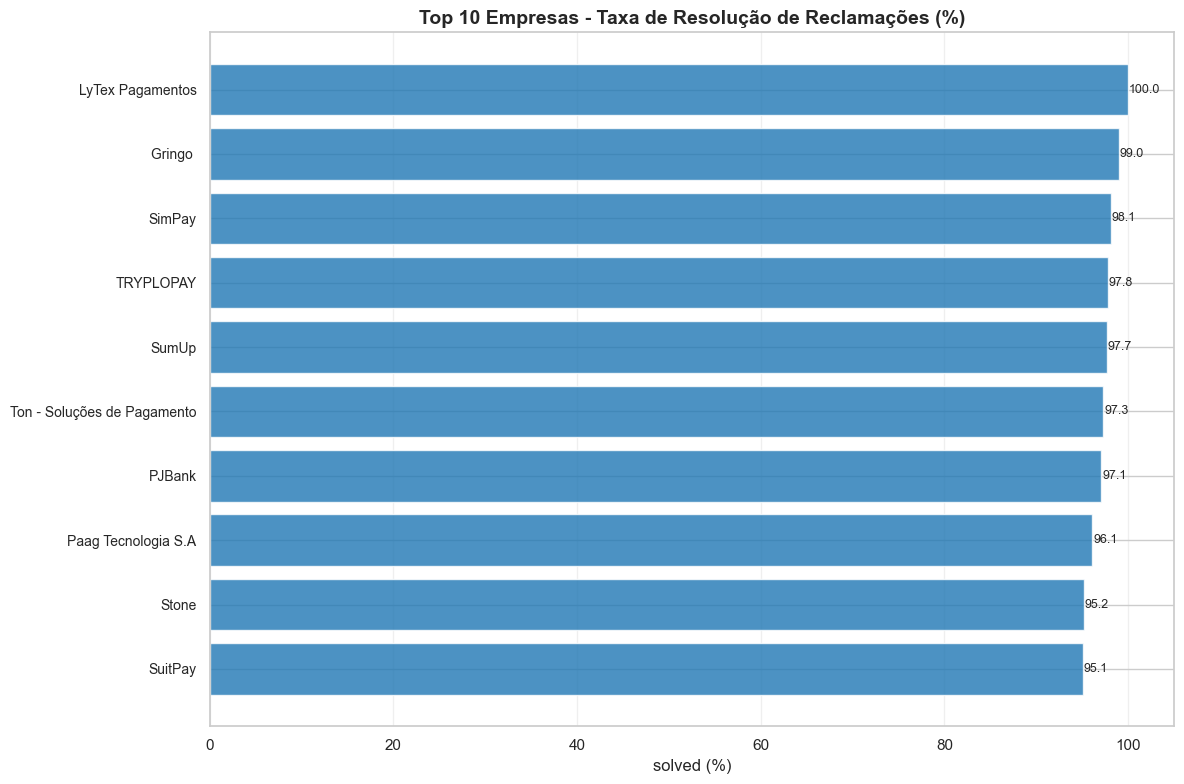

In [9]:
# Gráfico das top empresas
if ranking_pagamento is not None and len(ranking_pagamento) > 0:
    print("📊 Criando visualizações...")
    
    # 1. Top empresas por score
    fig1 = helper.plot_top_empresas(
        ranking_pagamento, 
        'finalScore',
        'Top 10 Empresas - Meios de Pagamento Eletrônico (Score Final)',
        10
    )
    plt.show()
    
    # 2. Top empresas por taxa de resolução
    fig2 = helper.plot_top_empresas(
        ranking_pagamento, 
        'solvedPercentual',
        'Top 10 Empresas - Taxa de Resolução de Reclamações (%)',
        10
    )
    plt.show()
    
else:
    print("❌ Não foi possível criar gráficos - dados insuficientes")

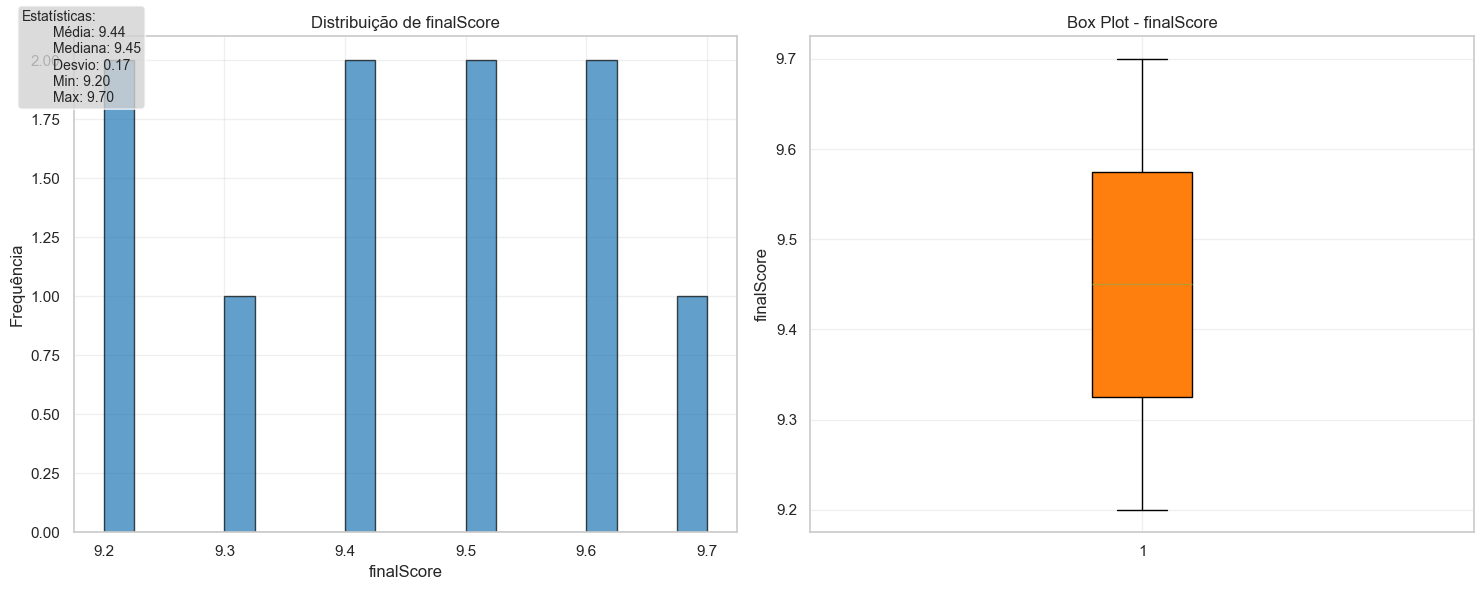

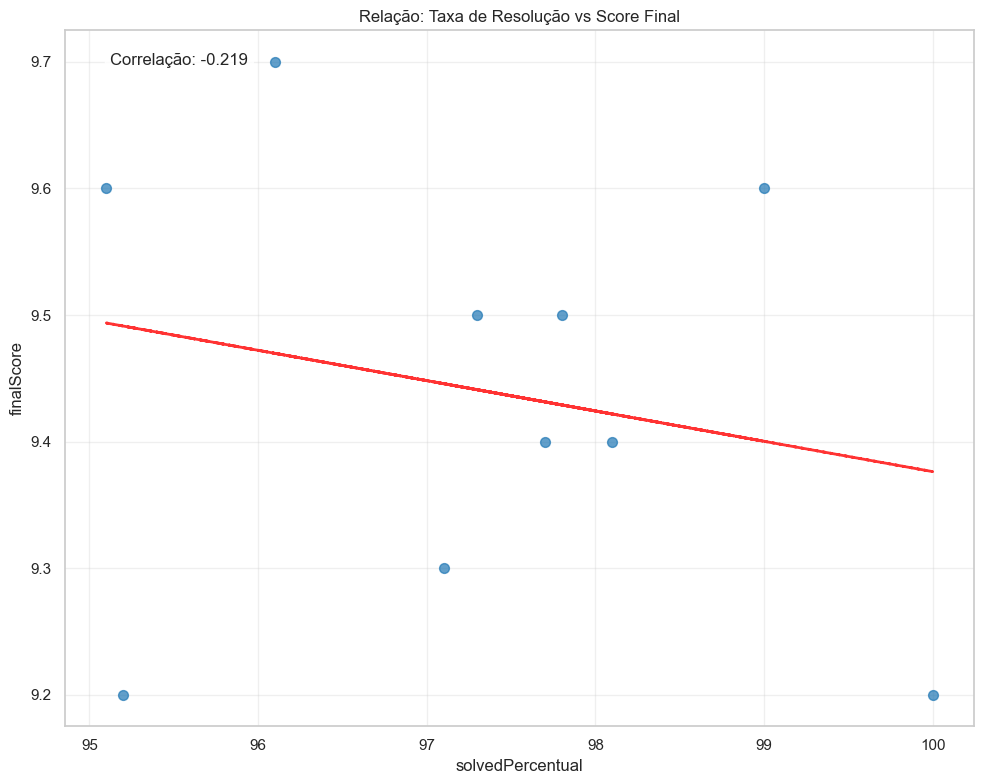

In [11]:
# Análise de distribuição
if ranking_pagamento is not None and len(ranking_pagamento) > 1:
    # Distribuição de scores
    fig3 = helper.plot_distribuicao_scores(ranking_pagamento, 'finalScore')
    plt.show()
    
    # Scatter plot: Score vs Taxa de Resolução
    if 'solvedPercentual' in ranking_pagamento.columns:
        fig4 = helper.plot_scatter_metricas(
            ranking_pagamento, 
            'solvedPercentual', 
            'finalScore',
            title='Relação: Taxa de Resolução vs Score Final'
        )
        plt.show()
else:
    print("⚠️  Poucas empresas para análise de distribuição")

## 🔍 Insights e Descobertas

In [14]:
# Análise de insights
if ranking_pagamento is not None and len(ranking_pagamento) > 0:
    print("🧠 INSIGHTS E DESCOBERTAS")
    print("=" * 50)
    
    # 1. Empresas com score mais alto
    melhor_empresa = ranking_pagamento.loc[ranking_pagamento['finalScore'].idxmax()]
    print(f"🏆 Melhor empresa: {melhor_empresa['companyName']} (Score: {melhor_empresa['finalScore']:.1f})")
    
    # 2. Empresas 100% verificadas?
    if 'isVerified' in ranking_pagamento.columns:
        todas_verificadas = ranking_pagamento['isVerified'].all()
        pct_verificadas = ranking_pagamento['isVerified'].mean() * 100
        print(f"✅ Empresas verificadas: {pct_verificadas:.0f}%")
    
    # 3. Correlações interessantes
    if 'solvedPercentual' in ranking_pagamento.columns:
        corr_score_resolucao = ranking_pagamento['finalScore'].corr(ranking_pagamento['solvedPercentual'])
        print(f"📊 Correlação Score vs Taxa de Resolução: {corr_score_resolucao:.3f}")
        
        if corr_score_resolucao > 0.7:
            print("   💡 Forte correlação positiva - empresas com maior score resolvem mais reclamações")
        elif corr_score_resolucao > 0.3:
            print("   💡 Correlação moderada - há relação entre score e resolução")
        else:
            print("   💡 Correlação fraca - score não está diretamente ligado à resolução")
    
    # 4. Variação de scores
    score_std = ranking_pagamento['finalScore'].std()
    score_range = ranking_pagamento['finalScore'].max() - ranking_pagamento['finalScore'].min()
    print(f"📈 Variação de scores: {score_range:.1f} pontos (desvio: {score_std:.2f})")
    
    if score_std < 0.5:
        print("   💡 Baixa variação - empresas têm performance similar")
    elif score_std > 1.0:
        print("   💡 Alta variação - há empresas com performance muito diferente")
    else:
        print("   💡 Variação moderada - diferenças notáveis entre empresas")
    
    # 5. Volume de reclamações
    if 'complainsCount' in ranking_pagamento.columns:
        total_reclamacoes = ranking_pagamento['complainsCount'].sum()
        media_reclamacoes = ranking_pagamento['complainsCount'].mean()
        print(f"📝 Total de reclamações: {total_reclamacoes:,}")
        print(f"📊 Média por empresa: {media_reclamacoes:.0f} reclamações")
        
        empresa_mais_reclamacoes = ranking_pagamento.loc[ranking_pagamento['complainsCount'].idxmax()]
        print(f"📢 Empresa com mais reclamações: {empresa_mais_reclamacoes['companyName']} ({empresa_mais_reclamacoes['complainsCount']} reclamações)")

else:
    print("❌ Não há dados suficientes para gerar insights")

🧠 INSIGHTS E DESCOBERTAS
🏆 Melhor empresa: Paag Tecnologia S.A (Score: 9.7)
✅ Empresas verificadas: 100%
📊 Correlação Score vs Taxa de Resolução: -0.219
   💡 Correlação fraca - score não está diretamente ligado à resolução
📈 Variação de scores: 0.5 pontos (desvio: 0.17)
   💡 Baixa variação - empresas têm performance similar
📝 Total de reclamações: 13,597
📊 Média por empresa: 1360 reclamações
📢 Empresa com mais reclamações: Ton - Soluções de Pagamento (6275 reclamações)


## 📝 Resumo e Próximos Passos

In [15]:
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 50)

# Resumo dos dados carregados
print(f"📊 Datasets analisados: {len(dados)}")
for nome, df in dados.items():
    if isinstance(df, pd.DataFrame):
        print(f"   📂 {nome}: {len(df)} registros")

# Status atual
print("\n✅ FUNCIONANDO:")
print("   🔍 Sistema de leitura de dados")
print("   📊 Conversão para DataFrames")
print("   📈 Visualizações básicas")
print("   🎨 Gráficos interativos")
print("   📋 Análises estatísticas")

print("\n🎯 PRÓXIMOS PASSOS SUGERIDOS:")
print("   1. 📥 Coletar mais dados (ofertas, empresas detalhadas, reclamações)")
print("   2. 🏷️  Analisar outras categorias além de meios de pagamento")
print("   3. 📊 Criar comparações entre categorias")
print("   4. ⏰ Implementar análises temporais")
print("   5. 🌐 Desenvolver dashboard web interativo")
print("   6. 🤖 Adicionar machine learning para predições")

print("\n💡 IDEIAS PARA ANÁLISES FUTURAS:")
print("   📈 Correlação entre ofertas/cupons e reputação")
print("   🏆 Ranking geral cross-categoria")
print("   📊 Análise de sentimento nas reclamações")
print("   🎯 Identificação de outliers e padrões")
print("   📅 Tendências temporais de scores")

print("\n🎉 Análise exploratória concluída com sucesso!")

📋 RESUMO DA ANÁLISE EXPLORATÓRIA
📊 Datasets analisados: 3
   📂 categorias: 339 registros
   📂 categorias_com_ranking: 1 registros
   📂 ranking_bancos-e-financeiras_meios-de-pagamento-eletronico: 10 registros

✅ FUNCIONANDO:
   🔍 Sistema de leitura de dados
   📊 Conversão para DataFrames
   📈 Visualizações básicas
   🎨 Gráficos interativos
   📋 Análises estatísticas

🎯 PRÓXIMOS PASSOS SUGERIDOS:
   1. 📥 Coletar mais dados (ofertas, empresas detalhadas, reclamações)
   2. 🏷️  Analisar outras categorias além de meios de pagamento
   3. 📊 Criar comparações entre categorias
   4. ⏰ Implementar análises temporais
   5. 🌐 Desenvolver dashboard web interativo
   6. 🤖 Adicionar machine learning para predições

💡 IDEIAS PARA ANÁLISES FUTURAS:
   📈 Correlação entre ofertas/cupons e reputação
   🏆 Ranking geral cross-categoria
   📊 Análise de sentimento nas reclamações
   🎯 Identificação de outliers e padrões
   📅 Tendências temporais de scores

🎉 Análise exploratória concluída com sucesso!
